# Handwritten digit recognition

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [36]:
X, y = load_data()

In [37]:
print(f"X.shape = {X.shape}")

X.shape = (1000, 400)


In [38]:
print(f"{X[0]}")

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [39]:
#first and last value of y label
print(f"shape of y: {y.shape}")

print(f"First value : {y[0,0]} and Last value: {y[-1, 0]}")

shape of y: (1000, 1)
First value : 0 and Last value: 1


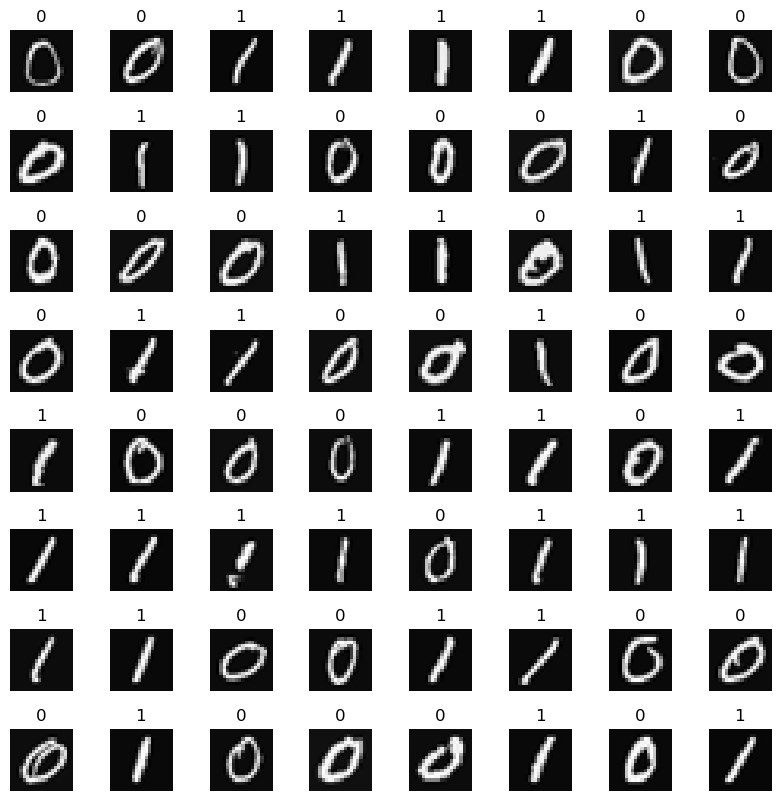

In [40]:
#visualization of data

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

m,n = X.shape

fig, axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad = 0.1)

for i,ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    #display the image
    ax.imshow(X_random_reshaped, cmap = 'gray')
    
    #display the label above each image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

# Neural Network implementation using Tensorflow

In [41]:
model = Sequential([
    tf.keras.Input(shape=(400,)),
    #layer 1
    Dense(units=25, activation='sigmoid'),
    #layer 2
    Dense(units = 15, activation='sigmoid'),
    #layer 3
    Dense(units=1, activation='sigmoid')
], name="Digit_recognition_model")

In [42]:
model.summary()

Model: "Digit_recognition_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
#number of parameters in Layer1, 2 and 3 are:-
L1_num_params = 400*25 + 25 # 400 inputs, 25 w's neurons and 25 b's
L2_num_params = 25*15 + 15 
L3_params = 15*1 + 1

print(f"L1 paramaters: {L1_num_params}, L2 parameters: {L2_num_params}, L3 parameters: {L3_params}")

L1 paramaters: 10025, L2 parameters: 390, L3 parameters: 16


In [44]:
#shape of weights/parameters

[layer1, layer2, layer3] = model.layers

In [45]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

print(f"W1 shape: {W1.shape}, b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")
print(f"W3 shape: {W3.shape}, b3 shape: {b3.shape}")

W1 shape: (400, 25), b1 shape: (25,)
W2 shape: (25, 15), b2 shape: (15,)
W3 shape: (15, 1), b3 shape: (1,)


In [46]:
#final layer weights
print(model.layers[2].get_weights())

[array([[ 0.3130852 ],
       [ 0.5131697 ],
       [ 0.5285328 ],
       [ 0.24836487],
       [-0.19496867],
       [-0.5091124 ],
       [-0.19694158],
       [-0.13039741],
       [ 0.4927413 ],
       [-0.4546279 ],
       [ 0.16798842],
       [ 0.43052953],
       [ 0.12884074],
       [ 0.60239106],
       [-0.42443824]], dtype=float32), array([0.], dtype=float32)]


In [47]:
#defina a loss function and run gradient descent to fit weights

model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(0.001)  #0.001 is the initial learning rate alpha
)

#step 3
model.fit(X, y, epochs = 25)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.7000
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.5050
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.3480
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.2370
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 0.1690
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.1304
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.0956
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.0800
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 0.0684
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 0.0635
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.0558
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.0419
Epoch 13/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.0419
Epoch 14/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 0.0346
Epoch 15/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - lo

# Prediction of the output

In [48]:
prediction = model.predict(X[0].reshape(1,400))
print(f"Prediction of 0: {prediction}")

prediction = model.predict(X[500].reshape(1,400))
print(f"Prediction of 1 : {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction of 0: [[0.01681108]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Prediction of 1 : [[0.99135554]]


# Setting a threshold value

In [49]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
    
print(f"Prediction after setting threshold value: {yhat}")

Prediction after setting threshold value: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1

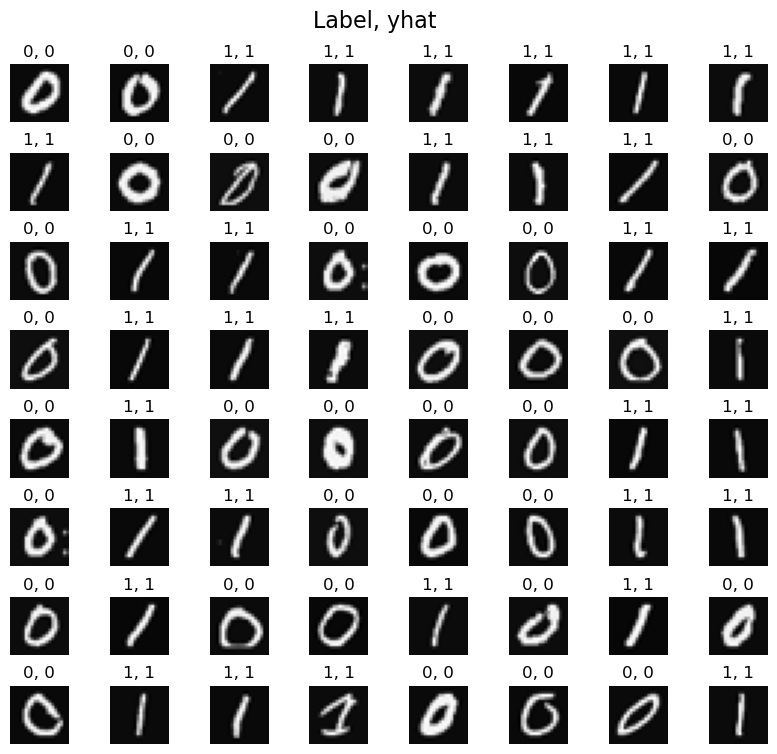

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape

fig,axes = plt.subplots(8,8, figsize=(8,8))

fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap = 'gray')
    
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
        
    #display label over image
    
    ax.set_title(f"{y[random_index,0]}, {yhat}")
    ax.set_axis_off()
    
fig.suptitle("Label, yhat", fontsize = 16)
plt.show()

# exercise 2 : build a dense layer subroutine

In [51]:
def my_dense(a_in, w, b, g):
    
    units = w.shape[1]
    a_out = np.zeros(units)
    
    for j in range(units):
        z = np.dot(w[:,j], a_in) + b[j]
        a_out[j] = g(z)
        
    return (a_out)

In [52]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,) # 2 elements [1,2] in 1-D array
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) #6 elements [[1,2,3],  [4,5,6]] in a 2D array
b_tst = 0.1*np.arange(1,4,1).reshape(3,) # 3 elemets in a 1D array
A_tsts = my_dense(x_tst, W_tst, b_tst, sigmoid)

print(A_tsts)

[0.54735762 0.57932425 0.61063923]


In [53]:
#sequential layer for the neural network
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    
    return a3

In [54]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()



In [55]:
#make prediction on the sequential layer 

prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)

if prediction >= 0.5:
    yhat = 1
    
else:
    yhat = 0
    
    
print("yhat = ", yhat, "label = ", y[0,0])


prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
if prediction >= 0.5:
    yhat = 1
    
else:
    yhat = 0
    
    
print("yhat = ", yhat, "label = ", y[500,0])



yhat =  0 label =  0
yhat =  1 label =  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1

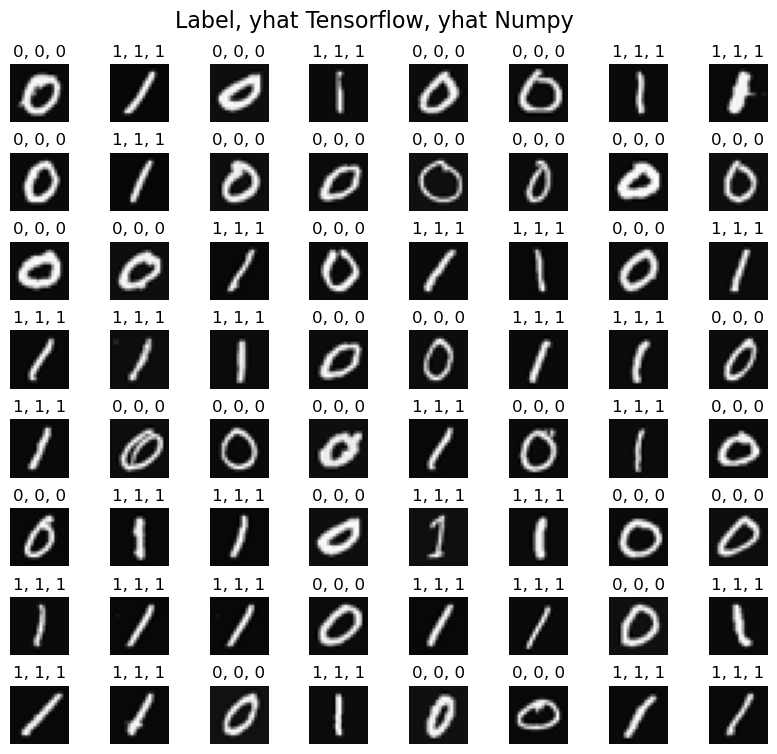

In [56]:
#printing results for both the tensorflow and numpy model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape

fig, axes = plt.subplots(8,8,figsize=(8,8))

fig.tight_layout(pad = 0.1, rect = [0,0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
    
    my_yhat = int(my_prediction >= 0.5)
    
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    #label above each image
    ax.set_title(f"{y[random_index,0]}, {tf_yhat}, {my_yhat}")
    ax.set_axis_off()
    
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize = 16)
plt.show()

In [57]:
#matrix multiplication
x = X[0].reshape(-1,1) # column vector (400,1)
z1 = np.matmul(x.T, W1) + b1 #x.T transpose of 400,1 to 1,400 ie 1 row x 400 columns as w1 is 400, 1
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


# Exercise 3

In [58]:
def my_dense_v(A_in, w, b, g):
    
    z = np.matmul(A_in, w) + b
    A_out = g(z)
    
    return (A_out)

In [59]:
#x,w,b values
x_tst = 0.1 * np.arange(1, 9, 1).reshape(4,2) # 4 example and 2 features
w_tst = 0.1 * np.arange(1, 7, 1).reshape(2,3) # 2 input features and 3 output features
b_tst = 0.1 * np.arange(1,4,1).reshape(1,3) # 3 features thus 3 values of b
A_tst = my_dense_v(x_tst, w_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


In [60]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    a1 = my_dense_v(X, W1, b1, sigmoid)
    a2 = my_dense_v(a1, W2, b2, sigmoid)
    a3 = my_dense_v(a2, W3, b3, sigmoid)
    
    return a3

In [61]:
w1_tmp, b1_tmp = layer1.get_weights()
w2_tmp, b2_tmp = layer2.get_weights()
w3_tmp, b3_tmp = layer3.get_weights()

In [62]:
prediction = my_sequential_v(X, w1_tmp, b1_tmp, w2_tmp, b2_tmp, w3_tmp, b3_tmp)
print(prediction.shape)

(1000, 1)


In [64]:
yhat = (prediction >= 0.5).astype(int)
print("predict a zero: ", yhat[0], "predict a one: ", yhat[500])

predict a zero:  [0] predict a one:  [1]
